In [13]:
import xarray as xr
import numpy as np

fpath = "/work/Katherine.Turner/tempest-extremes/odiv-251/data"
fpath2 = "/work/Katherine.Turner/tempest-extremes/odiv-251/comp_temp/"
fpath3 = "/work/Katherine.Turner/tempest-extremes/odiv-251/comp_hfds/"

In [4]:
# step 1 - convert 6 hourly averages to daily averages

yrs = np.arange(151,246,5)

for i,yr in enumerate(yrs):
    ds_in = xr.open_dataset(f"{fpath}/atmos.0{str(yr)}010100-0{str(yr+4)}123123.t_ref.nc", use_cftime=True)
    ds_out = ds_in.resample(time="D").mean()
    ds_out.to_netcdf(f"{fpath}/atmos.0{str(yr)}0101-0{str(yr+4)}1231.t_ref.nc")

In [52]:
ds_in.t_ref

<xarray.DataArray 't_ref' (time: 7300, lat: 180, lon: 288)>
[378432000 values with dtype=float32]
Coordinates:
  * lat      (lat) float64 -89.5 -88.5 -87.5 -86.5 -85.5 ... 86.5 87.5 88.5 89.5
  * lon      (lon) float64 0.625 1.875 3.125 4.375 ... 355.6 356.9 358.1 359.4
  * time     (time) object 0241-01-01 03:00:00 ... 0245-12-31 21:00:00
Attributes:
    long_name:      temperature at 2 m
    units:          deg_k
    valid_range:    [100. 400.]
    cell_methods:   time: mean
    time_avg_info:  average_T1,average_T2,average_DT
    interp_method:  conserve_order2

In [60]:
daily_averages = np.zeros(shape=(365*5,180,288))
for i in np.arange(365*5):
    daily_averages[i,:,:] = ds_in.t_ref[i*4:(i+1)*4,:,:].mean("time").data

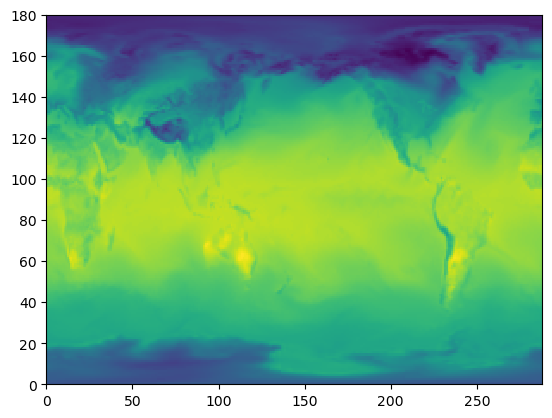

In [61]:
plt.pcolormesh(daily_averages[0,:,:])

In [20]:
# step 2 - change time for t_ref_anom to the time from hdfs_anom 
# as for some inexplicable reason the starting date has changed -- this is annoying

for i,yr in enumerate(yrs):
    in_temp = xr.open_mfdataset(f"{fpath2}/t_ref_anom_{str(yr)}_{str(yr+4)}.nc", use_cftime=True)
    in_hfds = xr.open_mfdataset(f"{fpath3}/hfds_anom_{str(yr)}_{str(yr+4)}.nc", use_cftime=True)

    ds_out = xr.Dataset(
        data_vars=dict(
            t_ref_anom=(["time", "lat", "lon"], in_temp.t_ref_anom.data),
        ),
        coords=dict(
            lon=(["lon"], in_temp.lon.data),
            lat=(["lat"], in_temp.lat.data),
            time=in_hfds.time.data,
        ),
        attrs=dict(description="Updated t_ref_anom with consistent times for compositing."),
    )
    ds_out.to_netcdf(f"{fpath2}/t_ref_anom_{str(yr)}_{str(yr+4)}_2.nc")

In [35]:
d = xr.open_dataset(f"{fpath2}/comp_t_ref_anom.nc", use_cftime=True)

In [46]:
idx = (d.snap_time.dt.hour == 12)

d.snap_t_ref_anom[idx,:,:]

<xarray.DataArray 'snap_t_ref_anom' (snapshot: 216942, y: 40, x: 40)>
[347107200 values with dtype=float32]
Coordinates:
  * x        (x) float64 -9.75 -9.25 -8.75 -8.25 -7.75 ... 8.25 8.75 9.25 9.75
  * y        (y) float64 -9.75 -9.25 -8.75 -8.25 -7.75 ... 8.25 8.75 9.25 9.75
Dimensions without coordinates: snapshot

In [ ]:
ncap2 -s 'time=double(time)' t_ref_anom_161_165.nc t_ref_anom_161_165_3.nc
ncap2 -s 'time=double(time)' t_ref_anom_166_170.nc t_ref_anom_166_170_3.nc
ncap2 -s 'time=double(time)' t_ref_anom_171_175.nc t_ref_anom_171_175_3.nc
ncap2 -s 'time=double(time)' t_ref_anom_176_180.nc t_ref_anom_176_180_3.nc
ncap2 -s 'time=double(time)' t_ref_anom_181_185.nc t_ref_anom_181_185_3.nc
ncap2 -s 'time=double(time)' t_ref_anom_186_190.nc t_ref_anom_186_190_3.nc
ncap2 -s 'time=double(time)' t_ref_anom_191_195.nc t_ref_anom_191_195_3.nc
ncap2 -s 'time=double(time)' t_ref_anom_196_200.nc t_ref_anom_196_200_3.nc
ncap2 -s 'time=double(time)' t_ref_anom_201_205.nc t_ref_anom_201_205_3.nc
ncap2 -s 'time=double(time)' t_ref_anom_206_210.nc t_ref_anom_206_210_3.nc
ncap2 -s 'time=double(time)' t_ref_anom_211_215.nc t_ref_anom_211_215_3.nc
ncap2 -s 'time=double(time)' t_ref_anom_216_220.nc t_ref_anom_216_220_3.nc
ncap2 -s 'time=double(time)' t_ref_anom_221_225.nc t_ref_anom_221_225_3.nc
ncap2 -s 'time=double(time)' t_ref_anom_226_230.nc t_ref_anom_226_230_3.nc
ncap2 -s 'time=double(time)' t_ref_anom_231_235.nc t_ref_anom_231_235_3.nc
ncap2 -s 'time=double(time)' t_ref_anom_236_240.nc t_ref_anom_236_240_3.nc
ncap2 -s 'time=double(time)' t_ref_anom_241_245.nc t_ref_anom_241_245_3.nc

